# Assignment 6
## Atharva Sripaad Galphade U25922351

#### Model Fitting on pre-processed dataset

Importing important libraries

In [72]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay

Reading the pre-processed dataset

In [20]:
bc_df = pd.read_csv('./data/Preprocessed_data.csv')
bc_df.head()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Check shape and value counts of the data in dataset to make sure that we got the proper data.

In [21]:
bc_df.shape

(569, 32)

In [22]:
bc_df['diagnosis_M'].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

In [23]:
bc_df = bc_df.drop(columns=['Unnamed: 0'])

Converting the dataset in target and features.

In [24]:
target= bc_df['diagnosis_M']
features=bc_df.drop(columns=['diagnosis_M'])

Spliting the data into training and test for random search and grid search

In [25]:
# split the data into validation and training set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

Scaling the Training and test features and standardizing the data in dataset. Doing this after the train test split to avoid data leakage.

In [26]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Using Decision Tree Classifier model for classifying the data.
After running the model, we got accuracy of 94.22% and precision is 93.83%

In [27]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, X_train, y_train, cv=10, scoring='accuracy')
print('Accuracy: ',scores.mean())

Accuracy:  0.9422435897435898


In [28]:
precision = cross_val_score(treeClassifier, X_train, y_train, cv=10, scoring='precision')
print('Precision: ',precision.mean())

Precision:  0.9382738095238097


### Doing the randomized search for tuning the hyperparameters in decision tree classifier.

In [29]:
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

Fitting the model with above parameters and choosing accuracy as a scoring method.

In [30]:
dtree_default = DecisionTreeClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
                                                estimator=DecisionTreeClassifier(random_state=1), 
                                                scoring='accuracy', 
                                                param_distributions=param_grid, 
                                                n_iter = 100, 
                                                cv=10, 
                                                verbose=0, 
                                                n_jobs = -1
                                            )
_ = best_random_search_model.fit(X_train, y_train)


#### Best parameters found using randomized search for the decision tree model

In [31]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found using Ranomized Search for DTC: ', random_search_best_params)

Best parameters found using Ranomized Search for DTC:  {'min_samples_split': 5, 'min_impurity_decrease': 0, 'max_depth': 40}


Checking the actual and predicted values side by side to get a better idea.

In [32]:
results_RS = pd.DataFrame()
results_RS['actual'] = y_test
results_RS['predicted'] = best_random_search_model.predict(X_test)
results_RS.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,0
245,0,0
453,0,0


#### Checking the accuracy, recall, precision and f1 score for the model when used randomized search.

In [33]:
y_pred = best_random_search_model.predict(X_test)
print("***Scores for DTC using randomized Search***")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")

***Scores for DTC using randomized Search***
Recall Score:     0.873015873015873
Accuracy Score:   0.9473684210526315
Precision Score:  0.9821428571428571
F1 Score:         0.9243697478991596
************************************


#### Using grid search keeping the above selected parameters from random search as base parameters and checking the appropriate parameters in its close promixity.

In [34]:
plus_minus = 5  #used for giving the rangeto values.

param_grid_GS = { 'max_depth': [x for x in range(random_search_best_params['max_depth']-plus_minus , random_search_best_params['max_depth']+plus_minus,2) if x > 0],
                'min_samples_split': [x for x in range(random_search_best_params['min_samples_split']-plus_minus, random_search_best_params['min_samples_split']+plus_minus,2) if x >= 2],       
                'min_impurity_decrease': [x for x in np.arange(random_search_best_params['min_impurity_decrease']-0.001, random_search_best_params['min_impurity_decrease']+0.001,.0001).round(5) if x >= 0.000]
              }

best_grid_search_model = GridSearchCV(
                                        estimator=DecisionTreeClassifier(random_state=1), 
                                        scoring='accuracy', 
                                        param_grid=param_grid_GS, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_model.fit(X_train, y_train)



#### List of best parameters found when done grid search on the base parameters by randomized search

In [35]:
grid_search_best_params = best_grid_search_model.best_params_
print('Best parameters found using Grid Search for DTC: ', grid_search_best_params)

Best parameters found using Grid Search for DTC:  {'max_depth': 35, 'min_impurity_decrease': 0.0, 'min_samples_split': 4}


Checking the actual and predicted values side by side to get a better idea.

In [36]:
results_GS = pd.DataFrame()
results_GS['actual'] = y_test
results_GS['predicted'] = best_grid_search_model.predict(X_test)
results_GS.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,0
245,0,0
453,0,0


#### Checking the accuracy, recall, precision and f1 score for the Decision Tree model after using Grid search.

In [37]:
y_pred_Grid = best_grid_search_model.predict(X_test)
print("***Scores for DTC using Grid Search***")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_Grid)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_Grid)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_Grid)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_Grid)}")
print("************************************")

***Scores for DTC using Grid Search***
Recall Score:     0.873015873015873
Accuracy Score:   0.9473684210526315
Precision Score:  0.9821428571428571
F1 Score:         0.9243697478991596
************************************


### Support vector Machine Support Vector Classifier using randomized search.

In [38]:
param_grid_SVC = {'C': [1, 10, 100, 1000,1000],
                  'gamma':[1, 10, 100, 1000],
                  'kernel':['linear','rbf']}

Training the model and looking for the predicted values and actual values.

In [39]:
clf_SVC = SVC(random_state=42)
best_random_SVC= RandomizedSearchCV(
                                    estimator=SVC(random_state=42),
                                    scoring='accuracy', 
                                    param_distributions=param_grid_SVC, 
                                    n_iter=10,
                                    cv=10, 
                                    verbose=0, 
                                    n_jobs = -1
                                    )

_=best_random_SVC.fit(X_train, y_train)

y_pred_linear = best_random_SVC.predict(X_test)
results_CLF = pd.DataFrame()
results_CLF['actual'] = y_test
results_CLF['predicted'] = y_pred_linear
results_CLF.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


#### List of best parameters found using Grid Search for SVC.

In [40]:
random_search_best_params_SVC = best_random_SVC.best_params_
print('Best parameters found using Randomized Search for SVC: ', random_search_best_params_SVC)

Best parameters found using Randomized Search for SVC:  {'kernel': 'linear', 'gamma': 10, 'C': 100}


#### Checking the accuracy, recall, precision and f1 score for the model after using random search.

In [41]:
# Accuracy
accuracy_RSVC = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_RSVC = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_RSVC = classification_report(y_test, y_pred_linear)
print('***Scores for SVC using Randomized Search***')
print(f'SVC Random Search Accuracy: {accuracy_RSVC}')
print(f'SVC Random Search Confusion Matrix: \n{conf_matrix_RSVC}')
print(f'SVC Random Search Classification Report: \n{class_report_RSVC}')
print('******************************************')

***Scores for SVC using Randomized Search***
SVC Random Search Accuracy: 0.9590643274853801
SVC Random Search Confusion Matrix: 
[[104   4]
 [  3  60]]
SVC Random Search Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

******************************************


#### Using grid search keeping the above selected parameters from random search as base parameters and checking the appropriate parameters in its close promixity

In [42]:
plus_minus = 10

param_grid_GS_SVC = { 'C': [x for x in range(random_search_best_params_SVC['C']-plus_minus , random_search_best_params_SVC['C']+plus_minus,10) if x > 0],
                  'gamma':[x for x in range(random_search_best_params_SVC['gamma']-100 , random_search_best_params_SVC['gamma']+100,100) if x > 0],
                  'kernel':['linear','rbf']
                    }

best_grid_search_SVCmodel = GridSearchCV(
                                        estimator=SVC(random_state=42), 
                                        scoring='accuracy', 
                                        param_grid=param_grid_GS_SVC, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_SVCmodel.fit(X_train, y_train)
                           
                           
y_pred_linear_GS = best_grid_search_SVCmodel.predict(X_test)
results_CLF_GS = pd.DataFrame()
results_CLF_GS['actual'] = y_test
results_CLF_GS['predicted'] = y_pred_linear_GS
results_CLF_GS.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


#### List of best parameters found using Grid Search for SVC.

In [43]:
grid_search_best_params_SVC = best_grid_search_SVCmodel.best_params_
print('Best parameters found using Grid Search for SVC: ', grid_search_best_params_SVC)

Best parameters found using Grid Search for SVC:  {'C': 90, 'gamma': 10, 'kernel': 'linear'}


#### Checking the accuracy, recall, precision and f1 score for the model after using Grid search.

In [44]:
# Accuracy
accuracy_GSVC = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_GSVC = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_GSVC = classification_report(y_test, y_pred_linear)
print('***Scores for SVC using Grid Search***')
print(f'SVC Grid Search Accuracy: {accuracy_GSVC}')
print(f'SVC Grid Search Confusion Matrix: \n{conf_matrix_GSVC}')
print(f'SVC Grid Search Classification Report: \n{class_report_GSVC}')
print('*******************************************')

***Scores for SVC using Grid Search***
SVC Grid Search Accuracy: 0.9590643274853801
SVC Grid Search Confusion Matrix: 
[[104   4]
 [  3  60]]
SVC Grid Search Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

*******************************************


### Logistic Regression using randomized Search

In [45]:
param_grid_log={'solver':['lbfgs','liblinear','saga'],
                'max_iter':[5000,6000,7000,10000]
                }

In [46]:
lin_model = linear_model.LogisticRegression(random_state=42)
best_log_Reg= RandomizedSearchCV(
                                    estimator=linear_model.LogisticRegression(random_state=42),
                                    scoring='accuracy', 
                                    param_distributions=param_grid_log, 
                                    n_iter=10,
                                    cv=10, 
                                    verbose=0, 
                                    n_jobs = -1
                                    )

_=best_log_Reg.fit(X_train, y_train)

y_pred_log_reg = best_log_Reg.predict(X_test)
results_lr = pd.DataFrame()
results_lr['actual'] = y_test
results_lr['predicted'] = y_pred_linear
results_lr.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


#### List of best parameters found using Randomized Search for Logistic Regression.

In [47]:
random_search_best_params_lr = best_log_Reg.best_params_
print('Best parameters found: ', random_search_best_params_lr)

Best parameters found:  {'solver': 'liblinear', 'max_iter': 5000}


#### Checking the accuracy, recall, precision and f1 score for the model after using Random search.

In [48]:
# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log_reg)
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log_reg)
# Classification Report
class_report_log = classification_report(y_test, y_pred_log_reg)
print('***Scores for Logistic Regression using Randomized Search***')
print(f'Logistic Regression Random Accuracy: {accuracy_log}')
print(f'Logistic Regression Random Confusion Matrix: \n{conf_matrix_log}')
print(f'Logistic Regression Random Classification Report: \n{class_report_log}')
print('************************************************')

***Scores for Logistic Regression using Randomized Search***
Logistic Regression Random Accuracy: 0.9707602339181286
Logistic Regression Random Confusion Matrix: 
[[105   3]
 [  2  61]]
Logistic Regression Random Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

************************************************


### Logistic Regression using Grid Search

In [49]:
param_grid_GS_lr = { 'solver':['lbfgs','liblinear','saga'],
                      'max_iter':[x for x in range(random_search_best_params_lr['max_iter']-100 , random_search_best_params_lr['max_iter']+100,100) if x > 0],
                    }

best_grid_search_lrmodel = GridSearchCV(
                                        estimator=linear_model.LogisticRegression(random_state=42), 
                                        scoring='accuracy', 
                                        param_grid=param_grid_GS_lr, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_lrmodel.fit(X_train, y_train)
                           
                           
y_pred_lr_GS = best_grid_search_lrmodel.predict(X_test)
results_CLF_GS = pd.DataFrame()
results_CLF_GS['actual'] = y_test
results_CLF_GS['predicted'] = y_pred_lr_GS
results_CLF_GS.head(20)

,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


#### List of best parameters found using Grid Search for Logistic Regression.

In [50]:
grid_search_best_params_lr = best_grid_search_lrmodel.best_params_
print('Best parameters found: ', grid_search_best_params_lr)

Best parameters found:  {'max_iter': 4900, 'solver': 'lbfgs'}


#### Checking the accuracy, recall, precision and f1 score for the model after using Grid search.

In [51]:
# Accuracy
accuracy_log_GS = accuracy_score(y_test, y_pred_lr_GS)
# Confusion Matrix
conf_matrix_log_GS = confusion_matrix(y_test, y_pred_lr_GS)
# Classification Report
class_report_log_GS = classification_report(y_test, y_pred_lr_GS)
print('***Scores for Logistic Regression using Grid Search***')
print(f'Logistic Regression Grid Accuracy: {accuracy_log}')
print(f'Logistic Regression Grid Confusion Matrix: \n{conf_matrix_log}')
print(f'Logistic Regression Grid Classification Report: \n{class_report_log}')
print('************************************************')

***Scores for Logistic Regression using Grid Search***
Logistic Regression Grid Accuracy: 0.9707602339181286
Logistic Regression Grid Confusion Matrix: 
[[105   3]
 [  2  61]]
Logistic Regression Grid Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

************************************************


Random Forest Classifier with randomized search

In [52]:
 param_grid_RF={'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [53]:
rf=RandomForestClassifier(random_state=42)
best_random_rf= RandomizedSearchCV(
                                    estimator=rf,
                                    scoring='accuracy', 
                                    param_distributions=param_grid_RF, 
                                    n_iter=10,
                                    cv=10, 
                                    verbose=0, 
                                    n_jobs = -1
                                    )
_ = best_random_rf.fit(X_train, y_train)
                           
                           
y_pred_rf_rs = best_random_rf.predict(X_test)
results_rf_rs = pd.DataFrame()
results_rf_rs['actual'] = y_test
results_rf_rs['predicted'] = y_pred_rf_rs
results_rf_rs.head(20)


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\athar\anaconda3\Lib\site-packages

,actual,predicted
421,0,1
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


In [57]:
random_search_best_params_rf = best_random_rf.best_params_
print('Best parameters found: ', random_search_best_params_rf)

Best parameters found:  {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [54]:
# Accuracy
accuracy_rf_rs = accuracy_score(y_test, y_pred_rf_rs)
# Confusion Matrix
conf_matrix_rf_rs = confusion_matrix(y_test, y_pred_rf_rs)
# Classification Report
class_report_rf_rs = classification_report(y_test, y_pred_rf_rs)
print('***Scores for Random Forest using Random Search***')
print(f'Random Forest using Random Accuracy: {accuracy_rf_rs}')
print(f'Random Forest using Random Confusion Matrix: \n{conf_matrix_rf_rs}')
print(f'Random Forest using Random Classification Report: \n{class_report_rf_rs}')
print('************************************************')

***Scores for Random Forest using Random Search***
Random Forest using Random Accuracy: 0.9415204678362573
Random Forest using Random Confusion Matrix: 
[[104   4]
 [  6  57]]
Random Forest using Random Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

************************************************


Random Forest Classifier with Grid Search

In [67]:
param_grid_GS_rf = { 'bootstrap': [True, False],
                     'max_depth':[x for x in range(random_search_best_params_rf['max_depth']-5 , random_search_best_params_rf['max_depth']+5,10) if x > 10],
                     'max_features': ['auto', 'sqrt'],
                     'min_samples_leaf':[x for x in range(random_search_best_params_rf['min_samples_leaf']-2 , random_search_best_params_rf['min_samples_leaf']+2,2) if x > 3],
                     'min_samples_split':[x for x in range(max(1,random_search_best_params_rf['min_samples_split']-5) , random_search_best_params_rf['min_samples_split']+5,5) if x > 2],
                     'n_estimators':[x for x in range(random_search_best_params_rf['n_estimators']-200 , random_search_best_params_rf['n_estimators']+200,100) if x > 100],
                   }

best_grid_search_rfmodel = GridSearchCV(
                                        estimator=rf, 
                                        scoring='accuracy', 
                                        param_grid=param_grid_GS_rf, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_rfmodel.fit(X_train, y_train)
                           
                           
y_pred_rf_GS = best_grid_search_rfmodel.predict(X_test)
results_CLF_GS = pd.DataFrame()
results_CLF_GS['actual'] = y_test
results_CLF_GS['predicted'] = y_pred_rf_GS
results_CLF_GS.head(20)

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\athar\anaconda3\Lib\site-packages

,actual,predicted
421,0,1
47,1,1
292,0,0
186,1,1
414,1,1
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


In [78]:
grid_search_best_params_rf = best_grid_search_rfmodel.best_params_
print('Best parameters found: ', grid_search_best_params_rf)

Best parameters found:  {'bootstrap': True, 'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 1700}


In [70]:
# Accuracy
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf_GS)
# Confusion Matrix
conf_matrix_rf_gs = confusion_matrix(y_test, y_pred_rf_GS)
# Classification Report
class_report_rf_gs = classification_report(y_test, y_pred_rf_GS)
print('***Scores for Random Forest using Grid Search***')
print(f'Random Forest using Grid Accuracy: {accuracy_rf_gs}')
print(f'Random Forest using Grid Confusion Matrix: \n{conf_matrix_rf_gs}')
print(f'Random Forest using Grid Classification Report: \n{class_report_rf_gs}')
print('************************************************')

***Scores for Random Forest using Random Search***
Random Forest using Random Accuracy: 0.9415204678362573
Random Forest using Random Confusion Matrix: 
[[104   4]
 [  6  57]]
Random Forest using Random Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

************************************************


Adaboost Classifier with random search.

In [77]:
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid_AC_rs = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
    ]
}

best_random_search_ACmodel = RandomizedSearchCV(
                                        estimator=ada_classifier, 
                                        scoring='accuracy', 
                                        param_distributions=param_grid_AC_rs, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_random_search_ACmodel.fit(X_train, y_train)
                           
                           
y_pred_ac_rs = best_random_search_ACmodel.predict(X_test)
results_ac_rs = pd.DataFrame()
results_ac_rs['actual'] = y_test
results_ac_rs['predicted'] = y_pred_ac_rs
results_ac_rs.head(20)

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,0
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


In [84]:
random_search_best_params_ac = best_random_search_ACmodel.best_params_
print('Best parameters found: ', random_search_best_params_ac)

Best parameters found:  {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2)}


In [85]:
# Accuracy
accuracy_rs_ac = accuracy_score(y_test, y_pred_ac_rs)
# Confusion Matrix
conf_matrix_rs_ac = confusion_matrix(y_test, y_pred_ac_rs)
# Classification Report
class_report_rs_ac = classification_report(y_test, y_pred_ac_rs)
print('***Scores for Adaboost using Random Search***')
print(f'Adaboost using Random Accuracy: {accuracy_rs_ac}')
print(f'Adaboost using Random Confusion Matrix: \n{conf_matrix_rs_ac}')
print(f'Adaboost using Random Classification Report: \n{class_report_rs_ac}')
print('************************************************')

***Scores for Adaboost using Random Search***
Adaboost using Random Accuracy: 0.9649122807017544
Adaboost using Random Confusion Matrix: 
[[106   2]
 [  4  59]]
Adaboost using Random Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

************************************************


Adaboost Classifier with Grid Search.

In [89]:
param_grid_GS_rf = { 'n_estimators':[x for x in range(random_search_best_params_ac['n_estimators']-30 , random_search_best_params_ac['n_estimators']+30,50) if x > 10],
                     'learning_rate': [x for x in np.arange(random_search_best_params_ac['learning_rate']-0.001, random_search_best_params_ac['learning_rate']+0.001,.0001).round(5) if x >= 0.000],
                     'base_estimator': [
                                        DecisionTreeClassifier(max_depth=1),
                                        DecisionTreeClassifier(max_depth=2),
                                       ]   }

best_grid_search_acmodel = GridSearchCV(
                                        estimator=ada_classifier, 
                                        scoring='accuracy', 
                                        param_grid=param_grid_GS_rf, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_acmodel.fit(X_train, y_train)
                           
                           
y_pred_ac_GS = best_grid_search_acmodel.predict(X_test)
results_ac_GS = pd.DataFrame()
results_ac_GS['actual'] = y_test
results_ac_GS['predicted'] = y_pred_ac_GS
results_ac_GS.head(20)


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,actual,predicted
421,0,0
47,1,1
292,0,0
186,1,1
414,1,0
132,1,1
161,1,1
197,1,1
245,0,0
453,0,0


In [90]:
grid_search_best_params_ac = best_grid_search_acmodel.best_params_
print('Best parameters found: ', grid_search_best_params_ac)

Best parameters found:  {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1006, 'n_estimators': 120}


In [91]:
# Accuracy
accuracy_gs_ac = accuracy_score(y_test, y_pred_ac_GS)
# Confusion Matrix
conf_matrix_gs_ac = confusion_matrix(y_test, y_pred_ac_GS)
# Classification Report
class_report_gs_ac = classification_report(y_test, y_pred_ac_GS)
print('***Scores for Adaboost using grid Search***')
print(f'Adaboost using grid Accuracy: {accuracy_gs_ac}')
print(f'Adaboost using grid Confusion Matrix: \n{conf_matrix_gs_ac}')
print(f'Adaboost using grid Classification Report: \n{class_report_gs_ac}')
print('************************************************')

***Scores for Adaboost using grid Search***
Adaboost using grid Accuracy: 0.9532163742690059
Adaboost using grid Confusion Matrix: 
[[105   3]
 [  5  58]]
Adaboost using grid Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

************************************************


Using ROC curve to visualize the performance of models using Randomized Search. After looking at the graph we can say that the logistic regression and SVC have performed better. This can be seen by Area under Curve. More the area under curve better is the performance of model.

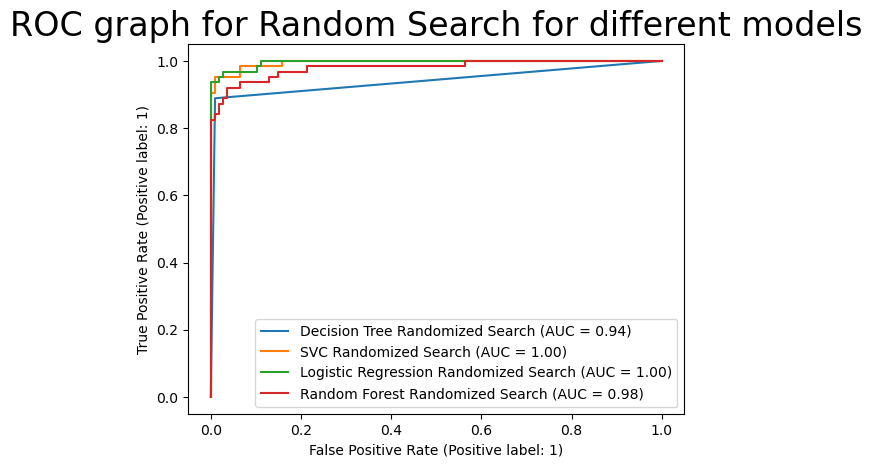

In [55]:
ROC_RandomizedSearch= RocCurveDisplay.from_estimator(best_random_search_model,X_test,y_test,name='Decision Tree Randomized Search') 
RocCurveDisplay.from_estimator(best_random_SVC,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='SVC Randomized Search') 
RocCurveDisplay.from_estimator(best_log_Reg,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='Logistic Regression Randomized Search')
RocCurveDisplay.from_estimator(best_random_rf,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='Random Forest Randomized Search')
plt.title('ROC graph for Random Search for different models', fontsize=24)
plt.show()

Using ROC curve to visualize the performance of models using Grid Search. After looking at the graph we can say that the logistic regression and SVC have performed better. This can be seen by Area under Curve. More the area under curve better is the performance of model.

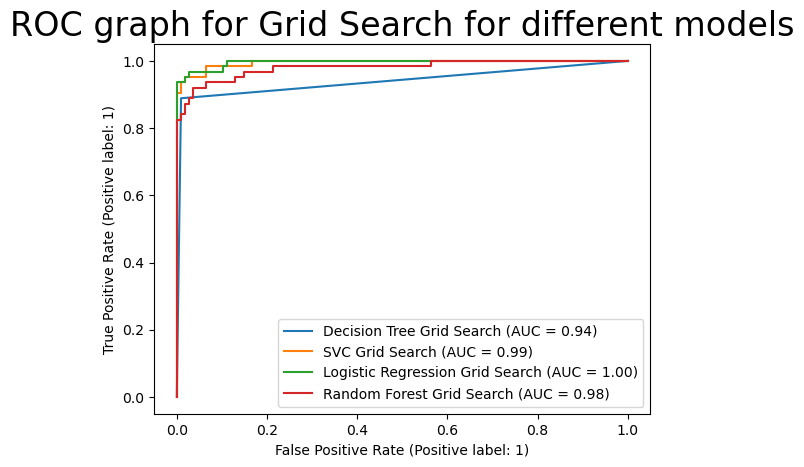

In [71]:
ROC_GRIDSearch= RocCurveDisplay.from_estimator(best_grid_search_model,X_test,y_test,name='Decision Tree Grid Search') 
RocCurveDisplay.from_estimator(best_grid_search_SVCmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='SVC Grid Search') 
RocCurveDisplay.from_estimator(best_grid_search_lrmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='Logistic Regression Grid Search')
RocCurveDisplay.from_estimator(best_grid_search_rfmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='Random Forest Grid Search')
plt.title('ROC graph for Grid Search for different models', fontsize=24)
plt.show()

In our analysis, we have decided to use accuracy as the performance metric because our dataset is well-balanced the ratio is 1.68:1, and both target variables are equally important. After evaluating the accuracy of various models, we found that the logistic regression performed the best. The optimal parameters for this model are 'max_iter': 4900, 'solver': 'lbfgs', resulting in an impressive accuracy of 97.07%. Given the significance of accuracy in our case, the Logistic Regression model with these parameters stands out as the top choice.